In [1]:
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import modelling as mdl
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import tkinter
import plotly

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [2]:
    MLdb = mdl.MLdata('../data_sets/feats/')
    MLdb.load_datasets()
    # MLdb.combine_datasets()
    # print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
    # print(MLdb.datadict['ALL'])
    # print(MLdb.get_datasets())
    MLdb.set_dataset(0)
    MLdb.clean_columns()
    MLdb.drop_na()
    MLdb.create_train_test_split(0.8)
    # MLdb.linear_regression()
    MLdb.use_model(modelfunc = LinearRegression)
    model = MLdb.model

1.2740938411379295


In [3]:
len(MLdb.test_x)

20001

In [4]:
len(MLdb.test_y.iloc[:,0])

20001

In [5]:
import psutil
psutil.Process().memory_info().rss / (1024*1024)

5351.890625

In [6]:
y_pred = model.predict(MLdb.test_x)
horizon = 6*1
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_x.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [7]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [8]:
len(MLdb.naive_predictive())
# MLdb.test_x

20001

In [9]:
y_pred_naive = MLdb.naive_predictive().to_numpy()

<Figure size 432x288 with 0 Axes>

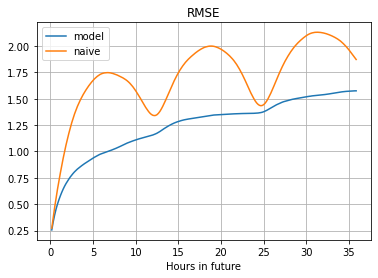

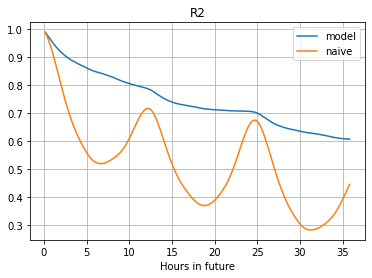

<Figure size 432x288 with 0 Axes>

In [10]:
MSE_list = []
R2_list = []
MSE_list_naive = []
R2_list_naive = []


for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_naive = y_pred_naive[:,i]
    MSE_list.append(mse(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    MSE_list_naive.append(mse(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,MSE_list,label = 'model')
plt.plot(x_bereik,MSE_list_naive,label = 'naive')
plt.title('RMSE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [11]:
R2_list

array([0.98964774, 0.98250666, 0.97504016, 0.96758949, 0.96048501,
       0.95376807, 0.94725133, 0.94091018, 0.93481946, 0.92912591,
       0.92378355, 0.91890698, 0.91413608, 0.90944697, 0.90516057,
       0.90117751, 0.89741541, 0.89410171, 0.89070676, 0.88783467,
       0.88494149, 0.88214609, 0.87935824, 0.87678555, 0.87439779,
       0.8718355 , 0.86929685, 0.86684995, 0.86427449, 0.86171919,
       0.85924466, 0.85696115, 0.8547392 , 0.85257151, 0.85052164,
       0.84905724, 0.84759627, 0.84619813, 0.84477178, 0.84317716,
       0.84159554, 0.83994439, 0.83828006, 0.8366404 , 0.83490064,
       0.83302847, 0.83111628, 0.8291746 , 0.82706994, 0.82490406,
       0.82264872, 0.82042516, 0.81826644, 0.81622465, 0.81441162,
       0.81255522, 0.81091397, 0.80912698, 0.80750124, 0.80590496,
       0.80444159, 0.80280329, 0.80145811, 0.80017117, 0.79894607,
       0.79762042, 0.79622822, 0.79489477, 0.79349739, 0.7922215 ,
       0.79074037, 0.78923229, 0.78738151, 0.78522789, 0.78286

In [12]:
np.array(R2_list).clip(min=0)

array([0.98964774, 0.98250666, 0.97504016, 0.96758949, 0.96048501,
       0.95376807, 0.94725133, 0.94091018, 0.93481946, 0.92912591,
       0.92378355, 0.91890698, 0.91413608, 0.90944697, 0.90516057,
       0.90117751, 0.89741541, 0.89410171, 0.89070676, 0.88783467,
       0.88494149, 0.88214609, 0.87935824, 0.87678555, 0.87439779,
       0.8718355 , 0.86929685, 0.86684995, 0.86427449, 0.86171919,
       0.85924466, 0.85696115, 0.8547392 , 0.85257151, 0.85052164,
       0.84905724, 0.84759627, 0.84619813, 0.84477178, 0.84317716,
       0.84159554, 0.83994439, 0.83828006, 0.8366404 , 0.83490064,
       0.83302847, 0.83111628, 0.8291746 , 0.82706994, 0.82490406,
       0.82264872, 0.82042516, 0.81826644, 0.81622465, 0.81441162,
       0.81255522, 0.81091397, 0.80912698, 0.80750124, 0.80590496,
       0.80444159, 0.80280329, 0.80145811, 0.80017117, 0.79894607,
       0.79762042, 0.79622822, 0.79489477, 0.79349739, 0.7922215 ,
       0.79074037, 0.78923229, 0.78738151, 0.78522789, 0.78286